In [1]:
'''
MSOT OF THE TIME SPENT BY DATA SCIENTIST IS IN DATA CLEANING AS DATA IUN REAL WOPRLD IS VERY MESSY

SOMETIMES DATA MIGHT BE MISSSING AND WE FILLIN THE DATA WITH MEAN/MEDIAN/ETC. -> outlier detection

outlier detection, handling missing values, one hot encoding are examples of feature engineering.

Feature engineering is must for data scientist as data is not readily avaialable for use in real world.

'''

'\nMSOT OF THE TIME SPENT BY DATA SCIENTIST IS IN DATA CLEANING AS DATA IUN REAL WOPRLD IS VERY MESSY\n\nSOMETIMES DATA MIGHT BE MISSSING AND WE FILLIN THE DATA WITH MEAN/MEDIAN/ETC. -> outlier detection\n\noutlier detection, handling missing values, one hot encoding are examples of feature engineering.\n\nFeature engineering is must for data scientist as data is not readily avaialable for use in real world.\n\n'

In [2]:
'''

outlier detection is very useful for removing or correcting the datyaset
like age can not be 1000 or marks % can not be 150 etc.

Methods -> 

1. percentile
2. zscore
3. boxplot nad scatterplot

'''

'\n\noutlier detection is very useful for removing or correcting the datyaset\nlike age can not be 1000 or marks % can not be 150 etc.\n\nMethods -> \n\n1. percentile\n2. zscore\n3. boxplot nad scatterplot\n\n'

In [3]:
import pandas as pd
data = pd.read_csv('heights.csv')
data

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [6]:
data['height'].quantile(0.95)   #it's like a percentile of 95%

9.689999999999998

In [7]:
maxx = data['height'].quantile(0.95)
maxx

9.689999999999998

In [10]:
data[data['height'] > maxx]

,name,height
9,imran,14.5


In [12]:
'''

seems it is out of real value

let's find in different way as well i.e lower side '''

"\n\nseems it is out of real value\n\nlet's find in different way as well i.e lower side "

In [14]:
data['height'].quantile(0.05)

3.6050000000000004

In [18]:
mini = data['height'].quantile(0.05)   
mini

3.6050000000000004

In [19]:
data[data['height']<mini]

,name,height
12,yoseph,1.2


In [20]:
'''

it could be baby....


but if the data is for adults then it is unrealistic

'''

'\n\nit could be baby....\n\n\nbut if the data is for adults then it is unrealistic\n\n'

In [24]:
data[(data['height']>mini) & (data['height'] < maxx)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [25]:
'''now lets work on different dataset '''

'now lets work on different dataset '

In [26]:
data = pd.read_csv('bhp.csv')
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [27]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [30]:
maxi,mini = data['price_per_sqft'].quantile([0.999,0.001])
maxi,mini

(50959.36200000098, 1366.184)

In [34]:
data[data['price_per_sqft']<mini]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [38]:
data[(data['price_per_sqft']>maxi)|(data['price_per_sqft']<mini)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [39]:
'''

now lets remove these outliers dfrom the data'''

'\n\nnow lets remove these outliers dfrom the data'

In [40]:
df = data[(data['price_per_sqft']<maxi)&(data['price_per_sqft']>mini)]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [41]:
'''28 rows went out'''

'28 rows went out'

In [42]:
'''-----------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------'''

'-----------------------------------------------------------------------------------------------\n--------------------------------------------------------------------------------------------------\n--------------------------------------------------------------------------------------------------'

In [43]:
df = pd.read_csv('heights.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381604, 64.15737694,
        66.63093784, 69.10449874, 71.57805964, 74.05162055, 76.52518145,
        78.99874235]),
 <BarContainer object of 10 artists>)

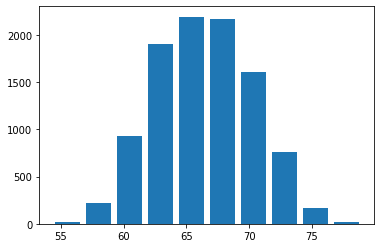

In [48]:
plt.hist(df['height'],rwidth=0.8)

In [52]:
from scipy.stats import norm
import numpy as np

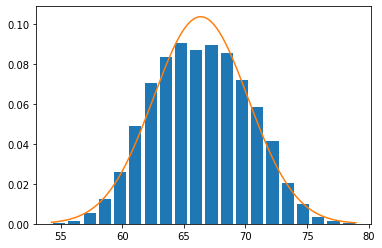

In [58]:
plt.hist(df['height'],rwidth=0.8,density=True,bins=20)

#next two lines are for bell curve
rng = np.arange(df['height'].min(),df['height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))

In [59]:
'''
Now we are going to remove std=3 data

'''

'\nNow we are going to remove std=3 data\n\n'

In [62]:
low,upp = df['height'].mean()-3*df['height'].std() , df['height'].mean()+3*df['height'].std()
low,upp

(54.824975392479274, 77.91014411725271)

In [63]:
df[(df['height']>upp) | (df['height']<low)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [64]:
data = df[(df['height']<upp) & (df['height']>low)]
data

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [65]:
'''data reduced'''

'data reduced'

In [75]:
df['z_score']=( df['height'] - df['height'].mean() ) / df['height'].std()
df

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [77]:
df[(df['z_score']>3) | (df['z_score']<-3)]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [78]:
'''using IQR NOW

TILL NOW -> 1. PERCENTILE, 2. STANDARD DEVIATION   3.Z_SCORE 

'''

'using IQR NOW\n\nTILL NOW -> 1. PERCENTILE, 2. STANDARD DEVIATION   3.Z_SCORE \n\n'

In [80]:
data = pd.read_csv('heights1.csv')
data

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [83]:
q1,q3 = data['height'].quantile([0.25,0.75])
q1,q3

(5.3500000000000005, 6.275)

In [84]:
iqr = q3-q1
iqr

0.9249999999999998

In [85]:
low,upp = q1-1.5*iqr, q3+1.5*iqr
low,upp

(3.962500000000001, 7.6625)

In [86]:
data[(data['height']>upp)| (data['height']<low)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [87]:
df = data[(data['height']<upp) & (data['height']>low)]
df

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9
